# Masks and Logical indexing

The last important topic in this part on basic image processing is how to select specific pixels, not by position as we did earlier, but by value. For this we need to create a mask or binary image where selected pixels are ON and other OFF. With this information, we can then extract those pixels to do further computations, an operation called logical indexing in Numpy.

## Logical operations in Python

In plain Python we can use logical operations such as:

In [1]:
a = 2

In [2]:
a > 3

False

In [3]:
a < 3

True

We see that the output tells us that the inequality is ```False``` or ```True```. We can actually assign this output to a variable and check its type:

In [4]:
out = a > 3
out

False

In [5]:
type(out)

bool

We see that we get a **boolean** variable. Boolean means that this is a variable that can only take on two values: True or False (or 1 and 0).

## Booleans in Numpy

Now we can do the a very similar operation directly with Numpy arrays. First we import an image and keep only one channel:

In [7]:
import skimage
import numpy as np
from microfilm.microplot import microshow
import matplotlib.pyplot as plt

image = skimage.io.imread('../data/cellatlas//19838_1252_F8_1.tiff')[1090:1590,450:1050,2]


In [8]:
image

array([[173, 147, 160, ...,   0,   0,   0],
       [184, 174, 161, ...,   0,   0,   0],
       [169, 162, 171, ...,   0,   0,   0],
       ...,
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0],
       [  0,   0,   0, ...,   0,   0,   0]], dtype=uint8)

In [9]:
image > 100

array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

We see that the output is again a Numpy array and that it is filled with ```True``` and ```False``` values: we have a **boolean array**. Again the comparison here was done **element wise**: each pixel was compared to the value 100 and the result stored in a new array. As with a simple number we can now save this **boolean array** as a variable:

In [10]:
array_bool = image > 100

As we are working with an image, what we have just done here is essentially **thresholding**: we created a binary image where pixels say ```True``` above the intensity threshold and ```False``` otherwise. We can actually plot the result:

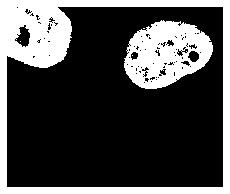

In [11]:
microshow(array_bool);

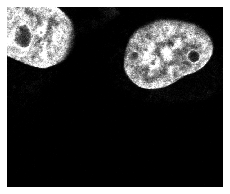

In [12]:
microshow(image);

## Combining boolean arrays

In some cases we create multiple masks based on different images and we want to combine them in the end. For example imagine that we have a mask of cells, a mask of nuclei and then want to recover pixels that are in either of these two locations. Let's create two such masks

In [14]:
im_cell = skimage.io.imread('../data/cellatlas/19838_1252_F8_1.tiff')[700:1500,300:1200,0]
im_nucl = skimage.io.imread('../data/cellatlas/19838_1252_F8_1.tiff')[700:1500,300:1200,2]

im_cell_mask = im_cell > 20
im_nucl_mask = im_nucl > 100

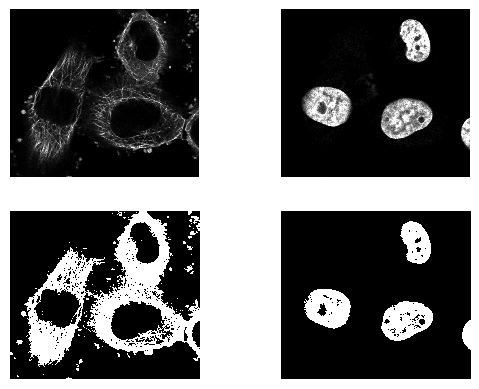

In [15]:
fig, ax = plt.subplots(2,2)
microshow(im_cell, ax=ax[0,0])
microshow(im_nucl, ax=ax[0,1])
microshow(im_cell_mask, ax=ax[1,0])
microshow(im_nucl_mask, ax=ax[1,1]);

Now we can do mathematics with these two masks. For example we can now compute ```im_cell_mask + im_nucl_mask``` which will give us pixels present in either of these two masks:

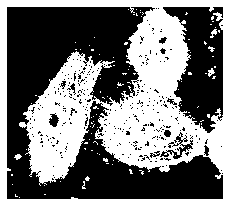

In [16]:
microshow(im_cell_mask + im_nucl_mask);

Or we can compute ```im_cell_mask * im_nucl_mask``` which will give us only pixels present in both masks:

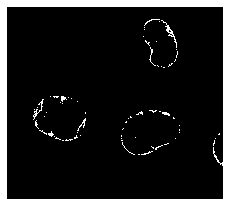

In [17]:
microshow(im_cell_mask * im_nucl_mask);

Formally we can also use Numpy functions that are more explicit in their action. For example:

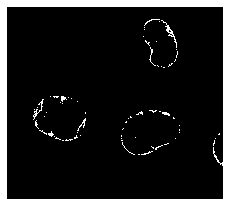

In [18]:
microshow(np.logical_and(im_cell_mask, im_nucl_mask));

## Logical indexing

One very important operation that we can use now is to combine the image with the boolean array **to extract only the ```True``` values** from the image. You can imagine of using the logical array as a mask, superposing it onto the image and extracting only the pixel that are visible through the white regions. The drawing below explains this concept:

In [19]:
from IPython.display import Image
Image(url='https://github.com/guiwitz/ISDAwPython_day2/raw/master/images/logical_indexing.jpeg',width=700)

This operation is performed by passing the boolean array (the indexing one) to the image in square parentheses:

In [20]:
image[array_bool]

array([173, 147, 160, ..., 109, 106, 104], dtype=uint8)

As you can see, the output is just 1D array, a list of numbers. Imagine that you want to estimate the average fluorescent intensity in those structures. This is exactly how we would proceed:
1. Find the objects of interest. Here we did it by (bad) manual thresholding
2. Find which pixels belong to these objects. This is done here using the above **logical indexing** ```image[array_bool]```
3. Finally compute the average of those values. This can simply be achieved by taking the ```mean``` of the above array:

In [21]:
extracted_pixels = image[array_bool]
extracted_pixels.mean()

185.42079056089773

## Exercise

1. Import the image ```coli_nucl_ori_ter_raw.tif```
2. Extract the first channel of the first time point
3. Create a mask of the image using a reasonable threshold
4. Using logical indexing, recover the pixels of the masks *in the second channel of the first time point*
5. Compute the median of those pixels